In [2]:
import numpy as np 
import pandas as pd

In [3]:
n = 100 # 데이터 포인트 수 
ar_params = [0.7] # 자기회귀 계수 
ma_params = [] # 이동평균 계수 
residuals = np.random.normal(0,1,n) # 전차 생성 

# AR(1) 모델 생성 
data = [0] # 초기값 설정 
for i in range(1, n) : 
    data.append(ar_params[0] * data[i-1] + residuals[i])

# 데이터 프레임 생성 
df = pd.DataFrame({
    'Date' : pd.date_range(start='2023-01-01', periods=n, freq='D'),
    'Value' : data
})

print(df.head())

        Date     Value
0 2023-01-01  0.000000
1 2023-01-02  0.395076
2 2023-01-03  0.794792
3 2023-01-04  1.915662
4 2023-01-05  1.238200


In [4]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf

                            AutoReg Model Results                             
Dep. Variable:                  Value   No. Observations:                  100
Model:                     AutoReg(1)   Log Likelihood                -130.741
Method:               Conditional MLE   S.D. of innovations              0.906
Date:                Tue, 25 Jul 2023   AIC                            267.481
Time:                        13:44:27   BIC                            275.266
Sample:                             1   HQIC                           270.631
                                  100                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0280      0.092      0.305      0.760      -0.151       0.207
Value.L1       0.6004      0.082      7.330      0.000       0.440       0.761
                                    Roots           

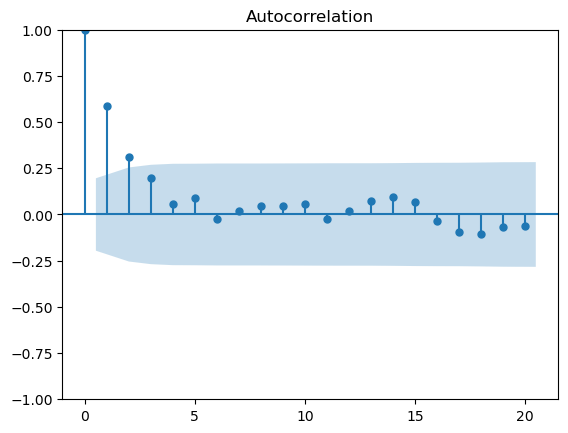

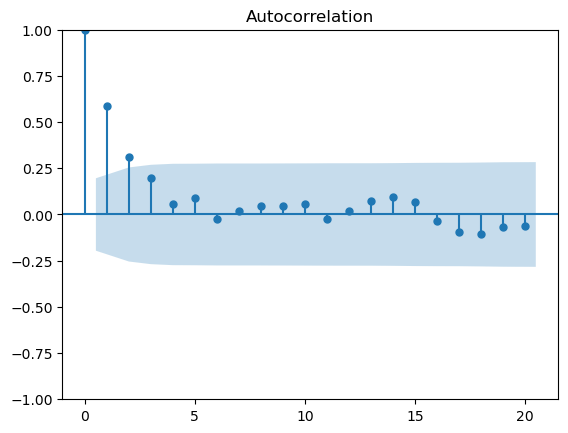

In [5]:
# AR (1) 모델 적합 
model = AutoReg(df['Value'], lags=1)
results = model.fit()

# 모델 정보 출력 
print(results.summary())

# ACF 그래프 출력 
plot_acf(df['Value'], lags=20)

- AIC, BIC 값이 낮을수록 모델 우수